In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
books_df_init = pd.read_csv('books.csv',  encoding='latin-1')

In [4]:
books_df_init.head(10)

,Book-Title,Author-Name,Description,Level,Image-URL,ISBN,Ratings
0,Artificial Intelligence: A Modern Approach,Stuart Russell and Peter Norvig,The leading textbook on artificial intelligenc...,advanced,https://images-na.ssl-images-amazon.com/images...,137903952,4.1
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.5
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.4
4,Python Machine Learning - Second Edition: Mach...,"Sebastian Raschka, Vahid Mirjalili",A beginner's guide to machine learning with Py...,beginners,https://m.media-amazon.com/images/I/41hc+wT0F3...,9.78E+12,4.5
5,Reinforcement Learning: An Introduction (Adapt...,Richard S. Sutton and Andrew G. Barto,"A classic textbook on reinforcement learning, ...",advanced,https://m.media-amazon.com/images/I/51-7xL6Utp...,262193981,3.0
6,The Master Algorithm: How the Quest for the Ul...,Pedro Domingos,A popular science book that explores the histo...,beginners,https://images-na.ssl-images-amazon.com/images...,465065708,4.3
7,Hands-On Machine Learning with Scikit-Learn an...,Aurélien Géron,A practical guide to machine learning using Py...,intermediate,https://m.media-amazon.com/images/I/51GcXOrWRO...,1492032646,2.3
8,Machine Learning for Absolute Beginners,Oliver Theobald,A friendly introduction to machine learning fo...,beginners,https://m.media-amazon.com/images/I/41KnH6vqp0...,152095140X,4.2
9,Introduction to Artificial Intelligence and Ex...,Dan W. Patterson,A comprehensive introduction to artificial int...,intermediate,https://m.media-amazon.com/images/I/417oWz7jjY...,134771001,4.4


In [5]:
books_df_init.shape

(250, 7)

In [6]:
books_df_init.columns

Index(['Book-Title', 'Author-Name', 'Description', 'Level', 'Image-URL',
       'ISBN', 'Ratings'],
      dtype='object')

In [7]:
# Lets remane some wierd columns name
books_df_init.rename(columns={"Book-Title":'title',
                      "Author-Name":'author',
                     "Image-URL":"image_url",
                      "Description": "description",
                      "Level": "levels",
                     "Ratings":"ratings"},inplace=True)

In [8]:
books_df_init.head(5)

,title,author,description,levels,image_url,ISBN,ratings
0,Artificial Intelligence: A Modern Approach,Stuart Russell and Peter Norvig,The leading textbook on artificial intelligenc...,advanced,https://images-na.ssl-images-amazon.com/images...,137903952,4.1
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.5
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.4
4,Python Machine Learning - Second Edition: Mach...,"Sebastian Raschka, Vahid Mirjalili",A beginner's guide to machine learning with Py...,beginners,https://m.media-amazon.com/images/I/41hc+wT0F3...,9.78E+12,4.5


In [9]:
books_df_init.isnull().sum()

title          0
author         0
description    0
levels         0
image_url      0
ISBN           0
ratings        0
dtype: int64

In [10]:
books_df_init.duplicated().sum()

0

In [11]:
# Subset the dataset with the specified columns
selected_columns = ['title', 'author', 'description', 'levels', 'image_url', 'ISBN', 'ratings']
books_subset = books_df_init[selected_columns]

In [12]:
# Display the first few rows of the dataset
print(books_subset.head())

                                               title  \
0         Artificial Intelligence: A Modern Approach   
1                                      Deep Learning   
2  Artificial Intelligence: A Modern Approach 3rd...   
3                  Neural Networks and Deep Learning   
4  Python Machine Learning - Second Edition: Mach...   

                                              author  \
0                    Stuart Russell and Peter Norvig   
1  Ian Goodfellow, Yoshua Bengio, and Aaron Courv...   
2                                 Russell and Norvig   
3                                    Michael Nielsen   
4                 Sebastian Raschka, Vahid Mirjalili   

                                         description        levels  \
0  The leading textbook on artificial intelligenc...      advanced   
1  A comprehensive introduction to deep learning,...  intermediate   
2  A shorter and more accessible introduction to ...     beginners   
3  Neural Networks and Deep Learning is a free

In [13]:
# Check the summary statistics of the dataset
print(books_subset.describe())

          ratings
count  250.000000
mean     3.527120
std      1.450841
min      0.000000
25%      3.300000
50%      4.000000
75%      4.500000
max      5.000000


In [14]:
# Count the number of missing values in each column
print(books_subset.isnull().sum())


title          0
author         0
description    0
levels         0
image_url      0
ISBN           0
ratings        0
dtype: int64


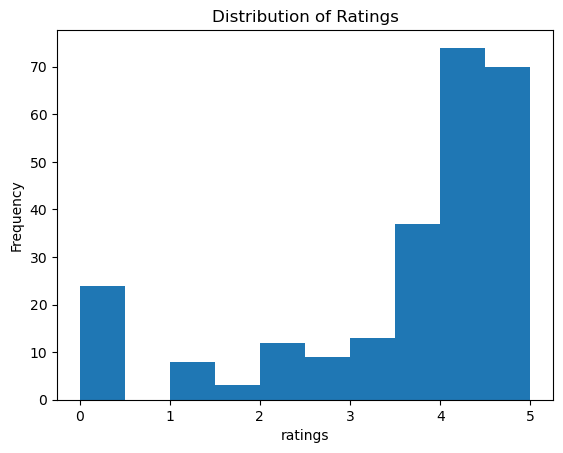

In [15]:
# Explore the distribution of ratings
import matplotlib.pyplot as plt
plt.hist(books_subset['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

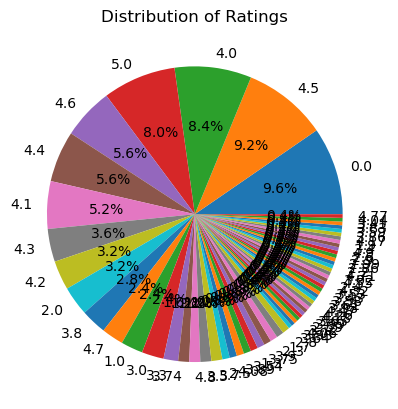

In [16]:
import matplotlib.pyplot as plt

# Calculate the frequency of each rating
rating_counts = books_subset['ratings'].value_counts()

# Create a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')

# Set the title of the pie chart
plt.title('Distribution of Ratings')

# Display the pie chart
plt.show()

In [17]:
#To find the book with the highest rating in the book dataset
highest_rated_book = books_subset[books_subset['ratings'] == books_subset['ratings'].max()]
#This code filters the books_subset DataFrame based on the condition books_subset['Ratings'] == books_subset['Ratings'].max(), which selects the rows where the 'Ratings' column has the maximum rating value. The resulting DataFrame, highest_rated_book, will contain the book(s) with the highest rating.


In [18]:
print(highest_rated_book)

                                                 title  \
10   AI Algorithms, Data Structures, and Idioms in ...   
63          Cybersecurity: What Everyone Needs to Know   
65   The Hardware Hacker: Adventures in Making and ...   
69                     Cyber Security in Organizations   
78          Metasploit: The Penetration Testers Guide   
79   Messing with the Enemy: Surviving in a Social ...   
84    Hacking Exposed 7: Network Security Secrets a...   
93        Enterprise Cybersecurity in Digital Business   
99                                    The Cuckoos Egg   
118  Data Science Ethics: Concepts Techniques and C...   
135  The Kaggle Book: Data analysis and machine lea...   
149  Designing Data-Intensive Applications: The Big...   
164  Advanced Machine Learning with Python: Solve d...   
177  Introducing HR Analytics with Machine Learning...   
184  Practicing Trustworthy Machine Learning: Consi...   
186  Bridging the AI Gap: Why some leaders create i...   
189  Python Da

In [19]:
highest_rated_book.head(10)

,title,author,description,levels,image_url,ISBN,ratings
10,"AI Algorithms, Data Structures, and Idioms in ...",George F. Luger and William A. Stubblefield,A comprehensive guide to artificial intelligen...,advanced,https://m.media-amazon.com/images/I/51vkYf0PSq...,136070477,5.0
63,Cybersecurity: What Everyone Needs to Know,"Peter W. Singer, Allan Friedman",Dependence on computers has had a transformati...,intermediate,https://m.media-amazon.com/images/I/51+YNUAkEe...,9.78E+12,5.0
65,The Hardware Hacker: Adventures in Making and ...,Andrew Bunnie Huang,"For over a decade, Andrew ""bunnie"" Huang, one ...",advanced,https://m.media-amazon.com/images/I/51L8sw3nZE...,159327758X,5.0
69,Cyber Security in Organizations,E. Fritzvold,The purpose of this book is to compare cyber s...,advanced,https://images-na.ssl-images-amazon.com/images...,154918974,5.0
78,Metasploit: The Penetration Testers Guide,"David Kennedy, Jim O'Gorman, Devon Kearns, Ma...","The book, quite famous amongst beginners, is w...",intermediate,https://m.media-amazon.com/images/I/51X+fMi346...,159327288X,5.0
79,Messing with the Enemy: Surviving in a Social ...,Clint Watts,Clint Watts electrified the nation when he tes...,intermediate,https://m.media-amazon.com/images/I/51UB8EjR23...,62795996,5.0
84,Hacking Exposed 7: Network Security Secrets a...,"George Kurtz, Joel Scambray, and Stuart McClure",Three cybersecurity specialists who have studi...,intermediate,https://m.media-amazon.com/images/I/51huRgIBJB...,71780289,5.0
93,Enterprise Cybersecurity in Digital Business,Ariel Evans,Cyber risk is the highest perceived business r...,advanced,https://m.media-amazon.com/images/I/51N3++Fr82...,367511495,5.0
99,The Cuckoos Egg,Cliff Stoll,"Clifford Stolls first book, The Cuckoos Eg...",advanced,https://m.media-amazon.com/images/I/51Iis55pxO...,1416507787,5.0
118,Data Science Ethics: Concepts Techniques and C...,David Martens,Data science ethics is all about what is right...,advanced,https://m.media-amazon.com/images/I/31Sgqj05yc...,192847279,5.0


In [20]:
highest_rated_book.shape

(20, 7)

In [21]:
zero_ratings_books = books_subset[books_subset['ratings'] == 0]
print(zero_ratings_books)

#This code will create a new DataFrame called zero_ratings_books that contains only the books with zero ratings, and then it will print the DataFrame to display the books.

                                                 title  \
2    Artificial Intelligence: A Modern Approach 3rd...   
12   Artificial Intelligence: Foundations of Comput...   
14    Grokking Deep Reinforcement Learning 1st Edition   
25              Advances in Financial Machine Learning   
28   Architects of Intelligence: The truth about AI...   
29           The Nature of Statistical Learning Theory   
30   Foundations of Machine Learning((Adaptive Comp...   
40          Introduction to Artificial Neural Networks   
52   Practical Malware Analysis: The Hands-On Guide...   
54       Hacking: The Art of Exploitation, 2nd Edition   
58   Scam Me If You Can: Simple Strategies to Outsm...   
60   CISSP (ISC)2 Certified Information Systems Sec...   
64                        BTFM: Blue Team Field Manual   
74   Hackers & Painters: Big Ideas From The Compute...   
98             The Art of Software Security Assessment   
109  Data Science on AWS: Implementing End-to-End C...   
111  Cleaning 

In [22]:
zero_ratings_books.shape

(24, 7)

# Explore the columns and data

In [23]:
# 1. Book-Title
book_titles = books_df_init['title']
# Check unique book titles
unique_titles = book_titles.unique()
# Count the number of unique book titles
num_unique_titles = len(unique_titles)
# Print the number of unique book titles
print("Number of unique book titles:", num_unique_titles)

Number of unique book titles: 250


In [24]:
# 2. Author-Name
author_names = books_df_init['author']
# Check unique author names
unique_authors = author_names.unique()
# Count the number of unique author names
num_unique_authors = len(unique_authors)
# Print the number of unique author names
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 248


In [25]:
# 3. Description
# Extract the descriptions
descriptions = books_df_init['description']
# Print the first few descriptions
print("First few descriptions:\n", descriptions.head())

First few descriptions:
 0    The leading textbook on artificial intelligenc...
1    A comprehensive introduction to deep learning,...
2    A shorter and more accessible introduction to ...
3    Neural Networks and Deep Learning is a free on...
4    A beginner's guide to machine learning with Py...
Name: description, dtype: object


In [26]:
# 4. Level
# Count the occurrences of each level
level_counts = books_df_init['levels'].value_counts()
# Print the level counts
print("Level counts:\n", level_counts)

Level counts:
 intermediate      90
advanced          73
beginners         70
inter-advanced    17
Name: levels, dtype: int64


In [27]:
# 5. Image-URL
# Check if there are missing image URLs
missing_image_urls = books_df_init['image_url'].isnull().sum()
# Print the number of missing image URLs
print("Number of missing image URLs:", missing_image_urls)

Number of missing image URLs: 0


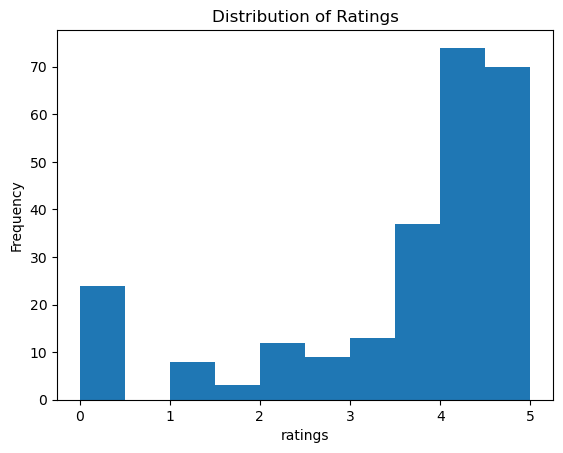

In [28]:
# 7. Ratings
# Check the distribution of ratings
ratings = books_df_init['ratings']
plt.hist(ratings)
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [29]:
# Get the unique author names
unique_authors = books_df_init['author'].unique()

# Count the number of unique author names
num_unique_authors = len(unique_authors)

# Print the number of unique author names
print("Number of unique authors:", num_unique_authors)

# Get the expected number of unique authors
expected_num_authors = 250

# Find the missing authors
missing_authors = set(range(1, expected_num_authors + 1)) - set(unique_authors)

# Print the missing authors
print("Missing authors:", missing_authors)


Number of unique authors: 248
Missing authors: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [74]:
# Get the unique book titles
unique_titles = books_df_init['title'].unique()

# Get the unique author names
unique_authors = books_df_init['author'].unique()

# Find missing author names
missing_authors = set(unique_titles) - set(unique_authors)

# Print the missing author names
print("Books with missing author names:")
for book_title in missing_authors:
    print(book_title)

Books with missing author names:
Evidence-Based Cybersecurity
Deep Learning on Graphs
This Is How They Tell Me the World Ends: The Cyberweapons Arms Race 
Life 3.0: Being Human in the Age of Artificial Intelligence
Gray Hat Hacking: The Ethical Hacker's Handbook, 5th Edition
Data Science from Scratch: First Principles with Python
The Book of Everlasting Things
THE ONES WE BURN
Hackers & Painters: Big Ideas From The Computer Age
Data Science Projects with Python: A case study approach to gaining valuable insights from real data with machine learning 2nd Edition
The Art of Software Security Assessment
Computer Hacking Beginners Guide
Data Science on AWS: Implementing End-to-End Continuous AI and Machine Learning Pipelines
 Algorithms of Oppression: How Search Engines Reinforce Racism
Stella Maris (The Passenger, #2)
Cleaning Data for Effective Data Science: Doing the other 80% of the work with Python R and command-line tools
A Small Affair
ACTING THE PART
The Art of Data Science
A Guide 

## retrieve the level with the highest ratings using the index attribute, and print it as the level with the most ratings.



In [31]:
# Group by level and calculate the sum of ratings for each level
level_ratings = books_df_init.groupby('levels')['ratings'].sum()

# Sort the results in descending order
level_ratings = level_ratings.sort_values(ascending=False)

# Get the level with the highest ratings
most_rated_level = level_ratings.index[0]

# Print the level with the highest ratings
print("Level with the most ratings:", most_rated_level)

Level with the most ratings: intermediate


# To perform EDA (Exploratory Data Analysis) for the highest level ratings, you can filter the dataset based on the highest-rated level and analyze various aspects of the data.

In [32]:
#Identify the level with the highest ratings:
highest_rated_level = level_ratings.index[0]

In [33]:
#Filter the dataset for the highest-rated level:
highest_level_data = books_df_init[books_df_init['levels'] == highest_rated_level]


In [34]:
#Explore the highest-rated level data:

#Print summary statistics:
print(highest_level_data.describe())

         ratings
count  90.000000
mean    3.879111
std     1.032212
min     0.000000
25%     3.815000
50%     4.100000
75%     4.500000
max     5.000000


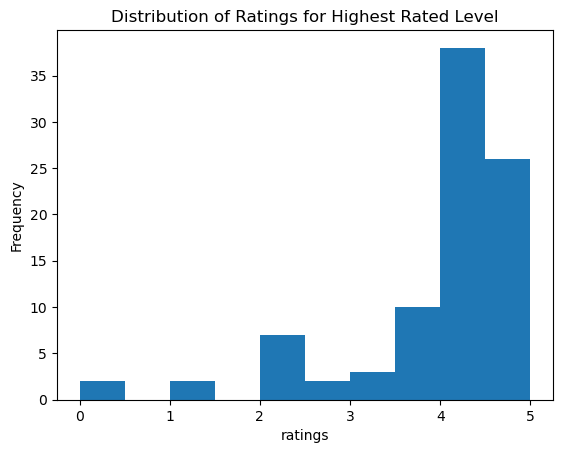

In [35]:
#Plot the distribution of ratings:
plt.hist(highest_level_data['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Highest Rated Level')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


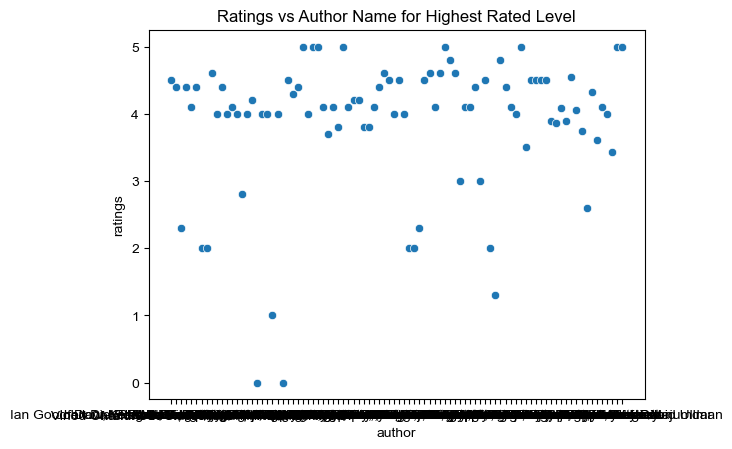

In [49]:
# Visualize the relationship between different variables:
import seaborn as sns
import matplotlib.font_manager as fm

# Set the font to a font that supports the required glyphs
font_path = fm.findfont(fm.FontProperties(family="Arial"))
plt.rcParams["font.family"] = fm.FontProperties(fname=font_path).get_name()

sns.scatterplot(data=highest_level_data, x='author', y='ratings')
plt.title('Ratings vs Author Name for Highest Rated Level')
plt.show()

In [37]:
# To find the name of the level that appears to have the highest rating in the plot, you can extract the level with the highest mean rating from the DataFrame and display it as the title of the plot.

# Calculate the mean ratings for each level
books_df_init.groupby('levels')['ratings'].mean()

levels
advanced          3.552466
beginners         3.070429
inter-advanced    3.435294
intermediate      3.879111
Name: ratings, dtype: float64

In [38]:
# Calculate the mean ratings for each level
level_ratings = books_df_init.groupby('levels')['ratings'].mean()

In [43]:
# Find the level with the highest mean rating
level_ratings.idxmax()

'intermediate'

In [44]:
# Find the level with the highest mean rating
highest_rated_level = level_ratings.idxmax()

In [40]:
# Filter the dataset for the highest-rated level
books_df_init[books_df_init['levels'] == highest_rated_level]

,title,author,description,levels,image_url,ISBN,ratings
1,Deep Learning,"Ian Goodfellow, Yoshua Bengio, and Aaron Courv...","A comprehensive introduction to deep learning,...",intermediate,https://m.media-amazon.com/images/I/61qbj4Kwau...,262035618,4.50
3,Neural Networks and Deep Learning,Michael Nielsen,Neural Networks and Deep Learning is a free on...,intermediate,https://coursesteach.com/pluginfile.php/4633/c...,1139495488,4.40
7,Hands-On Machine Learning with Scikit-Learn an...,Aurélien Géron,A practical guide to machine learning using Py...,intermediate,https://m.media-amazon.com/images/I/51GcXOrWRO...,1492032646,2.30
9,Introduction to Artificial Intelligence and Ex...,Dan W. Patterson,A comprehensive introduction to artificial int...,intermediate,https://m.media-amazon.com/images/I/417oWz7jjY...,134771001,4.40
11,Artificial Intelligence Engines : A Tutorial I...,James V. Stone,"In this richly illustrated book, key neural ne...",intermediate,https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...,956372813,4.10
...,...,...,...,...,...,...,...
230,"A RESTLESS TRUTH (THE LAST BINDING, #2)",Freya Marske,Magic! Murder! Shipboard romance! The second e...,intermediate,https://images-na.ssl-images-amazon.com/images...,1250788919,4.10
235,"DAWNLANDS (THE FAIRMILE, #3)",Philippa Gregory,The sweeping (Parade) and superb (People) ...,intermediate,https://images-na.ssl-images-amazon.com/images...,150118721X,4.00
238,THE RESEMBLANCE,Lauren Nossett,Never betray the brotherhood. On a chilly Nove...,intermediate,https://images-na.ssl-images-amazon.com/images...,1250843243,3.43
243,WHERE IT RAINS IN COLOR,Denise Crittendon,Lileala has just been named the Rare Indigo  ...,intermediate,https://images-na.ssl-images-amazon.com/images...,9.78E+12,5.00


In [41]:
# Filter the dataset for the highest-rated level
highest_level_data = books_df_init[books_df_init['levels'] == highest_rated_level]

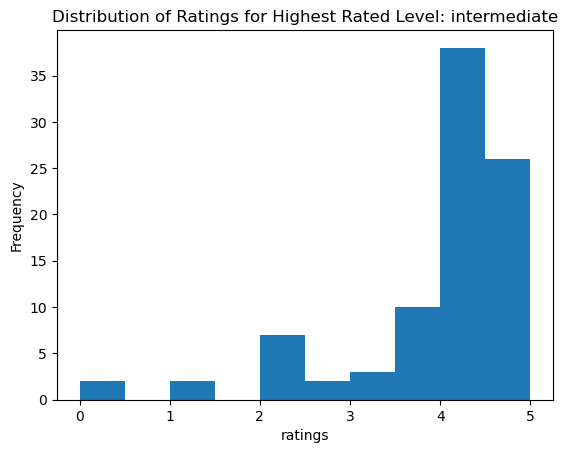

In [42]:
# Plot the distribution of ratings for the highest rated level
plt.hist(highest_level_data['ratings'])
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Highest Rated Level: {}'.format(highest_rated_level))
plt.show()

In [ ]:
 ## check which books received a rating of 0 along with their name , level and ISBN

In [59]:
books_df_init[books_df_init['ratings'] == 0]

,title,author,description,levels,image_url,ISBN,ratings
2,Artificial Intelligence: A Modern Approach 3rd...,Russell and Norvig,A shorter and more accessible introduction to ...,beginners,https://m.media-amazon.com/images/I/41HT2wMcAC...,136042597,0.0
12,Artificial Intelligence: Foundations of Comput...,David L. Poole and Alan K. Mackworth,A rigorous introduction to artificial intellig...,advanced,https://m.media-amazon.com/images/I/51cWmPO2NB...,521519004,0.0
14,Grokking Deep Reinforcement Learning 1st Edition,Miguel Morales,Grokking Deep Reinforcement Learning uses enga...,beginners,https://m.media-amazon.com/images/I/61KOxk3sEn...,1617295450,0.0
25,Advances in Financial Machine Learning,Marcos Lopez de Prado,This book talks about how one can structure Bi...,advanced,https://m.media-amazon.com/images/I/51A6sUbwG2...,1119482089,0.0
28,Architects of Intelligence: The truth about AI...,Martin Ford,This book grounded me on the essential dimensi...,beginners,https://m.media-amazon.com/images/I/416CY5lGam...,1789131510,0.0
29,The Nature of Statistical Learning Theory,V. N. Vapnik,This book is a comprehensive introduction to s...,advanced,https://m.media-amazon.com/images/I/41KCOU0mKC...,387987800,0.0
30,Foundations of Machine Learning((Adaptive Comp...,"Mehryar Mohri, Afshin Rostamizadeh, and Ameet...",This book is a comprehensive introduction to m...,advanced,https://m.media-amazon.com/images/I/41fqHpSJeq...,026201825X,0.0
40,Introduction to Artificial Neural Networks,Kevin Gurney,This book is an introduction to artificial neu...,intermediate,https://m.media-amazon.com/images/I/4158Rhxfn+...,1857285034,0.0
52,Practical Malware Analysis: The Hands-On Guide...,"Michael Sikorski, Andrew Honig","Malware analysis is big business, and attacks ...",beginners,https://m.media-amazon.com/images/I/51GY7SLYGF...,1593272901,0.0
54,"Hacking: The Art of Exploitation, 2nd Edition",Jon Erickson,Hacking is the art of creative problem solving...,beginners,https://m.media-amazon.com/images/I/61WRz4V+AD...,1593271441,0.0


In [61]:
zero_rating_books = books_df_init[books_df_init['ratings'] == 0]

In [63]:
zero_rating_books[['title', 'levels', 'ISBN']]

,title,levels,ISBN
2,Artificial Intelligence: A Modern Approach 3rd...,beginners,136042597
12,Artificial Intelligence: Foundations of Comput...,advanced,521519004
14,Grokking Deep Reinforcement Learning 1st Edition,beginners,1617295450
25,Advances in Financial Machine Learning,advanced,1119482089
28,Architects of Intelligence: The truth about AI...,beginners,1789131510
29,The Nature of Statistical Learning Theory,advanced,387987800
30,Foundations of Machine Learning((Adaptive Comp...,advanced,026201825X
40,Introduction to Artificial Neural Networks,intermediate,1857285034
52,Practical Malware Analysis: The Hands-On Guide...,beginners,1593272901
54,"Hacking: The Art of Exploitation, 2nd Edition",beginners,1593271441


In [64]:
zero_rating_books.shape

(24, 7)

In [65]:
zero_rating_books_info = zero_rating_books[['title', 'levels','ISBN']]

In [70]:
zero_rating_books_info.head(24)

,title,levels,ISBN
2,Artificial Intelligence: A Modern Approach 3rd...,beginners,136042597
12,Artificial Intelligence: Foundations of Comput...,advanced,521519004
14,Grokking Deep Reinforcement Learning 1st Edition,beginners,1617295450
25,Advances in Financial Machine Learning,advanced,1119482089
28,Architects of Intelligence: The truth about AI...,beginners,1789131510
29,The Nature of Statistical Learning Theory,advanced,387987800
30,Foundations of Machine Learning((Adaptive Comp...,advanced,026201825X
40,Introduction to Artificial Neural Networks,intermediate,1857285034
52,Practical Malware Analysis: The Hands-On Guide...,beginners,1593272901
54,"Hacking: The Art of Exploitation, 2nd Edition",beginners,1593271441


## Now perform popularity-based algorithm

In [ ]:
#To apply a popularity algorithm on the books dataset, you can use the rating data to determine the popularity of books based on the average ratings they receive.

In [50]:
# Calculate the average ratings for each book
books_df_init.groupby('title')['ratings'].mean()

title
 Algorithms of Oppression: How Search Engines Reinforce Racism                                                           4.50
 An Introduction to Statistical Learning                                                                                 3.50
 Data Science for Beginners                                                                                              3.90
 Hacking Exposed 7: Network Security Secrets and Solutions                                                               5.00
 Hacking: A Beginners Guide to Computer Hacking, Basic Security, And Penetration Testing                                3.80
                                                                                                                         ... 
WHERE IT RAINS IN COLOR                                                                                                  5.00
WHITE HORSE                                                                                                     

In [51]:
books_df_init.groupby('title')['ratings'].mean().reset_index()

,title,ratings
0,Algorithms of Oppression: How Search Engines ...,4.50
1,An Introduction to Statistical Learning,3.50
2,Data Science for Beginners,3.90
3,Hacking Exposed 7: Network Security Secrets a...,5.00
4,Hacking: A Beginners Guide to Computer Hacki...,3.80
...,...,...
245,WHERE IT RAINS IN COLOR,5.00
246,WHITE HORSE,3.65
247,WINTERLAND,3.98
248,Weapons of Math Destruction: How Big Data Incr...,4.30


In [53]:
# Calculate the average ratings for each book
book_ratings = books_df_init.groupby('title')['ratings'].mean().reset_index()

In [54]:
# Sort the books based on average ratings in descending order
popular_books = book_ratings.sort_values('ratings', ascending=False)

In [71]:
# Print the top 10 popular books
print("Top 10 popular books:")
popular_books.head(10)

Top 10 popular books:


,title,ratings
123,Introducing HR Analytics with Machine Learning...,5.0
19,"AI Algorithms, Data Structures, and Idioms in ...",5.0
71,Cybersecurity: What Everyone Needs to Know,5.0
75,Data Science Ethics: Concepts Techniques and C...,5.0
50,Bridging the AI Gap: Why some leaders create i...,5.0
96,Designing Data-Intensive Applications: The Big...,5.0
43,BOMBAY MONSOON,5.0
100,Enterprise Cybersecurity in Digital Business,5.0
227,The Kaggle Book: Data analysis and machine lea...,5.0
224,The Hardware Hacker: Adventures in Making and ...,5.0
